<h1 align=center>The Cobweb Model</h1>

Presentation follows <a href="http://www.parisschoolofeconomics.eu/docs/guesnerie-roger/hommes94.pdf">Hommes, <em>JEBO 1994</em></a>.  Let $p_t$ denote the <em>observed price</em> of goods and $p_t^e$ the <em>expected price</em> of goods in period $t$. Similarly, let $q_t^d$ denote the <em>quantity demanded</em> of all goods in period $t$ and $q_t^s$ the <em>quantity supplied</em> of all goods in period $t$.

\begin{align}
    q_t^d =& D(p_t) \tag{1} \\
    q_t^s =& S(p_t^e) \tag{2} \\
    q_t^d =& q_t^s \tag{3} \\
    p_t^e =& p_{t-1}^e + w\big(p_{t-1} - p_{t-1}^e\big) = (1 - w)p_{t-1}^e + w p_{t-1} \tag{4}
\end{align}

Equation 1 says that the quantity demanded of goods in period $t$ is some function of the <em>observed price</em> in period $t$. Equation 2, meanwhile, states that the quantity of goods supplied in period $t$ is a function of the <em>expected price</em> in period $t$. Equation 3 is a market clearing equilibrium condition. Finally, equation 4 is an adaptive expectation formation rule that specifies how goods producers form their expectations about the price of goods in period $t$ as a function of past prices.

Combine the equations as follows. Note that equation 3 implies that...

$$ D(p_t) = q_t^d = q_t^s = S(p_t^e) $$

...and therefore, assuming the demand function $D$ is invertible, we can write the observed price of goods in period $t$ as...

$$ p_t = D^{-1}\big(S(p_t^e)\big). \tag{5}$$

Substituting equation 5 into equation 4 we arrive at the following difference equation

$$ p_{t+1}^e = w D^{-1}\big(S(p_t^e)\big) + (1 - w)p_t^e. \tag{7}$$

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import functools

import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import seaborn as sns

import cobweb

In [5]:
def observed_price(D_inverse, S, expected_price, **params):
    """The observed price of goods in a particular period."""
    actual_price = D_inverse(S(expected_price, **params), **params)
    return actual_price


def adaptive_expectations(D_inverse, S, expected_price, w, **params):
    """An adaptive expectations price forecasting rule."""
    actual_price = observed_price(D_inverse, S, expected_price, **params)
    price_forecast = w * actual_price + (1 - w) * expected_price
    return price_forecast


<h2> Non-linear supply functions </h2>

When thinking about supply it helps to start with the following considerations...
<ol>
    <li> ...when prices are low, the quantity supplied increases slowly because of fixed costs of production (think startup costs, etc).
    <li> ...when prices are high, supply also increases slowly because of capacity constraints.
</ol>

These considerations motivate our focus on "S-shaped" supply functions...

$$ S_{\gamma}(p_t^e) = -tan^{-1}(-\gamma \bar{p}) + tan^{-1}(\gamma (p_t^e - \bar{p})). \tag{10}$$

The parameter $0 < \gamma < \infty$ controls the "steepness" of the supply function.

In [6]:
def quantity_supply(expected_price, gamma, p_bar, **params):
    """The quantity of goods supplied in period t given the epxected price."""
    return -np.arctan(-gamma * p_bar) + np.arctan(gamma * (expected_price - p_bar))

<h3> Exploring supply shocks </h3>

Interactively change the value of $\gamma$ to see the impact on the shape of the supply function.

In [7]:
ipywidgets.interact?

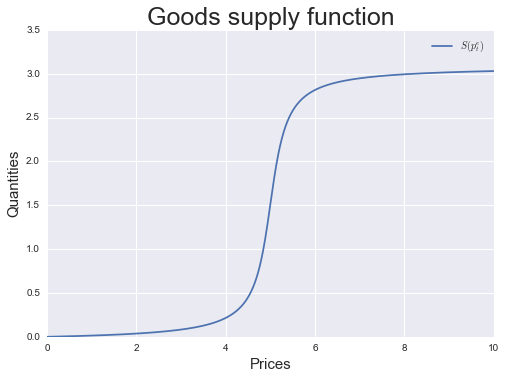

In [8]:
interactive_quantity_supply_plot = ipywidgets.interact(cobweb.quantity_supply_plot,
                                                       S=ipywidgets.fixed(quantity_supply),
                                                       gamma=cobweb.gamma_float_slider,
                                                       p_bar=cobweb.p_bar_float_slider)


<h2> Special case: Linear demand functions </h2>

Suppose the the quantity demanded of goods is a simple, decresing linear function of the observed price.

$$ q_t^d = D(p_t) = a - b p_t \implies p_t = D^{-1}(q_t^d) = \frac{a}{b} - \frac{1}{b}q_t^d \tag{11} $$

...where $-\infty < a < \infty$ and $0 < b < \infty$. 

In [9]:
def quantity_demand(observed_price, a, b):
    """The quantity demand of goods in period t given the price."""
    quantity = a - b * observed_price
    return quantity


def inverse_demand(quantity_demand, a, b, **params):
    """The price of goods in period t given the quantity demanded."""
    price = (a / b) - (1 / b) * quantity_demand
    return price

<h3> Exploring demand shocks </h3>

Interactively change the values of $a$ and $b$ to get a feel for how they impact demand.  Shocks to $a$ shift the entire demand curve; shocks to $b$ change the slope of the demand curve (higher $b$ implies greater sensitivity to price; lower $b$ implies less sensitivity to price).

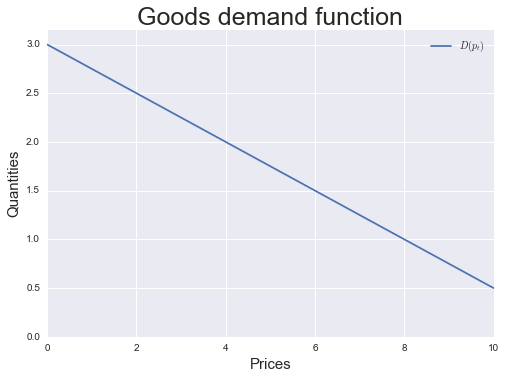

In [10]:
interactive_quantity_demand_plot = ipywidgets.interact(cobweb.quantity_demand_plot,
                                                       D=ipywidgets.fixed(quantity_demand),
                                                       a=cobweb.a_float_slider,
                                                       b=cobweb.b_float_slider)


<h2> Supply and demand </h2>

Market clearing equilibrium price, $p^*$, satisfies...

$$ D(p_t) = S(p_t^e). $$

Really this is also an equilibrium in beliefs because we also require that $p_t = p_t^e$!

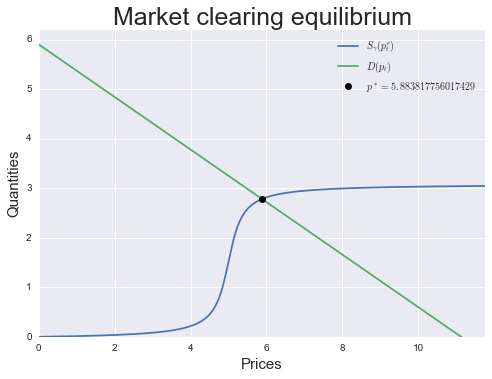

In [13]:
interactive_supply_demand_plot = ipywidgets.interact(cobweb.supply_demand_plot,
                                                     D=ipywidgets.fixed(quantity_demand),
                                                     S=ipywidgets.fixed(quantity_supply),
                                                     a=cobweb.a_float_slider,
                                                     b=cobweb.b_float_slider,
                                                     gamma=cobweb.gamma_float_slider,
                                                     p_bar=cobweb.p_bar_float_slider)


<h2> Analyzing dynamics of the model via simulation... </h2>

Model has no closed form solution (i.e., we can not solve for a function that describes $p_t^e$ as a function of time and model parameters).  BUT, we can simulate equation 7 above to better understand the dynamics of the model...

We can simulate our model and plot time series for different parameter values.  Questions for discussion...

<ol>
    <li> Can you find a two-cycle? What does this mean?</li>
    <li> Can you find higher cycles? Perhaps a four-cycle? Maybe even a three-cycle?</li>
    <li> Do simulations with similar initial conditions converge or diverge over time? </li> 
</ol>    

Can we relate these things to other SFI MOOCS on non-linear dynamics and chaos? Surely yes!

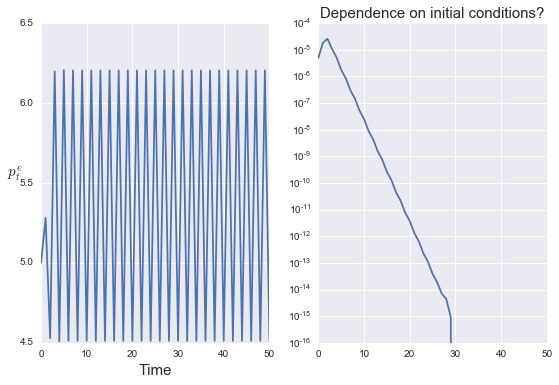

In [30]:
model = functools.partial(adaptive_expectations, inverse_demand, quantity_supply)
interactive_time_series_plot = ipywidgets.interact(cobweb.time_series_plot,
                                                   F=ipywidgets.fixed(model),
                                                   X0=cobweb.initial_expected_price_slider,
                                                   T=cobweb.T_int_slider,
                                                   a=cobweb.a_float_slider,
                                                   b=cobweb.b_float_slider,
                                                   w=cobweb.w_float_slider,
                                                   gamma=cobweb.gamma_float_slider,
                                                   p_bar=cobweb.p_bar_float_slider)

<h2> Forecast errors </h2>

How do we measure forecast error?  What does the distribution of forecast errors look like for different parameters? Could an agent learn to avoid chaos? Specifically, suppose an agent learned to tune the value of $w$ in order to minimize its mean forecast error. Would this eliminate chaotic dynamics?

In [32]:
interactive_forecast_error_plot = ipywidgets.interact(cobweb.forecast_error_plot,
                                                      D_inverse=ipywidgets.fixed(inverse_demand),
                                                      S=ipywidgets.fixed(quantity_supply),
                                                      F=ipywidgets.fixed(model),
                                                      X0=cobweb.initial_expected_price_slider,
                                                      T=cobweb.T_int_slider,
                                                      a=cobweb.a_float_slider,
                                                      b=cobweb.b_float_slider,
                                                      w=cobweb.w_float_slider,
                                                      gamma=cobweb.gamma_float_slider,
                                                      p_bar=cobweb.p_bar_float_slider)

NameError: name 'observed_price' is not defined

<h2> Other things of possible interest? </h2>

Impulse response functions?
Compare constrast model predictions for rational expectations, naive expectations, adaptive expectations.  Depending on what Cars might have in mind, we could also add other expectation formation rules from his more recent work and have students analyze those...